In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('/content/iris.xls') # read the dataset
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# understand shape of data
data.shape

(150, 5)

In [4]:
# to get brief information about data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# to describe the dataset numerical column
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# to check whether any null value present
data.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [7]:
# here handle missing value found in the above data by drop column
# instead of filling it with mean, median or range

data.dropna(inplace=True)

In [8]:
# to check whether any null value present
data.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [9]:
# to get brief information about data set
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              131 non-null    float64
 1   SW              131 non-null    float64
 2   PL              131 non-null    float64
 3   PW              131 non-null    float64
 4   Classification  131 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.1+ KB


<Axes: >

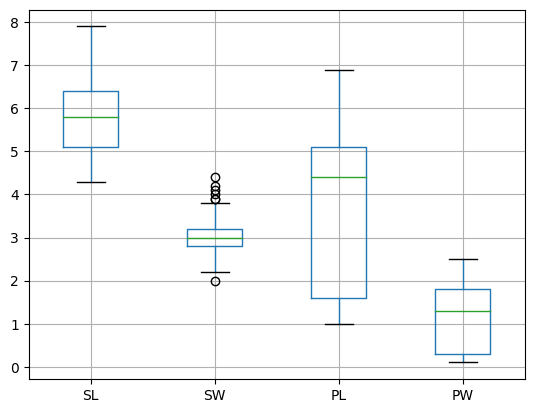

In [10]:
# visualize data using boxplot
data.boxplot()

In [11]:
# to check the target variable percentage in the dataset
data['Classification'].value_counts(normalize=True)

Classification
Iris-virginica     0.343511
Iris-versicolor    0.335878
Iris-setosa        0.320611
Name: proportion, dtype: float64

In [12]:
# label encoding the classification column in the dataset dataset

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Classification'] = le.fit_transform(data['Classification'])
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0


In [13]:
# Define dependent and target variable
x = data.drop('Classification', axis=1)
y = data['Classification']

In [14]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# **Logistic Regression**

In [16]:
# Carried out Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [17]:
# define empty dictionary to store acuuracy score
results = {}

In [18]:
# Evaluate the model
from sklearn.metrics import confusion_matrix, accuracy_score
# store the accuracy score in the dictionary
results['Logistic Regression'] = accuracy_score(y_test, y_pred)

# **KNN**

In [19]:
# Carried out the KNN Model & store the accuracy score in the dictionary
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neigbors = np.arange(3,15)

for k in neigbors:
  classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski',p=2)
  classifier.fit(x_train,y_train)
  y_pred = classifier.predict(x_test)
  acc = accuracy_score(y_test,y_pred)
  metric_k.append(acc)

metric_k
results['KNN'] = max(metric_k)

# **SVM**

In [20]:
# Carried out the SVM Model & store the accuracy score in the dictionary
from sklearn.svm import SVC
sv_clf = SVC(kernel = 'linear')
sv_clf.fit(x_train,y_train)
y_pred = sv_clf.predict(x_test)
results['SVM'] = accuracy_score(y_test, y_pred)

# **Decision Tree**

In [21]:
# Carried out the Decision Tree Model & store the accuracy score in the dictionary
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train,y_train)
y_pred = dt_clf.predict(x_test)
results['Decision Tree'] = accuracy_score(y_test, y_pred)

# **Random Forest**

In [22]:
# Carried out the Random Forest Model & store the accuracy score in the dictionary
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train,y_train)
y_pred = rf_clf.predict(x_test)
results['Random Forest'] = accuracy_score(y_test, y_pred)

In [23]:
# To show the results
results

{'Logistic Regression': 0.9629629629629629,
 'KNN': 1.0,
 'SVM': 0.9259259259259259,
 'Decision Tree': 0.9629629629629629,
 'Random Forest': 0.9629629629629629}

**Upon assessing each model, it has been determined that the KNN model exhibits superior accuracy.**